# QuantumAI.Cloud Screening Test - Task 1

Develop a Python program to generate a list of 2n unique random positive integers, each using a maximum of n bits and represented in decimals, and another random positive integer, k, using n bits. Then, choose one (or more, if you prefer) of the following options to implement:

1. Check if k exists in the list.

2. Find all integers less than k in the list.

Display the results and the number of steps required to achieve them.



In [2]:
import random

In [3]:
def generate_random_list(n : int):
    """
    n: positive integer value
    Returns random number k and list_n of 2n unique positive integers.
    """
    max_value = 2**n
    num_of_value = 2*n
    list_n = random.sample(range(1, max_value), num_of_value)
    k = random.randint(1, max_value)
    return k, list_n

def search_k(k: int, list_n: list[int]):
    """
    k: positive integer number
    list_n: list of positive integers.
    Returns (True, n_steps) if k exists, and (False, n_steps) otherwise,
    where n_steps is the number of steps needed.
    """
    n_steps = 0
    for i in list_n:
        n_steps += 1
        if i == k:
            return True, n_steps
    return False, n_steps
    

def less_than_k(k: int, list_n: list[int]):
    """
    k: positive integer number
    list_n: list of positive integers.
    Return (list_nk, n_steps), where list_nk contains all numbers in list_n that 
    are less than k (if any), n_steps is the number of steps needed.
    """
    n_steps = 0
    list_nk = list_n.copy()
    for i in list_n:
        n_steps += 1
        if i >= k:
            list_nk.remove(i)
    return list_nk, n_steps

In [4]:
k, list_n = generate_random_list(10)
k_exist = search_k(k, list_n)
list_nk = less_than_k(k, list_n)
print(k, list_n)
print(k_exist)
print(list_nk)

445 [935, 295, 699, 772, 886, 541, 789, 267, 1022, 754, 657, 150, 511, 981, 67, 994, 253, 288, 70, 910]
(False, 20)
([295, 267, 150, 67, 253, 288, 70], 20)


**1. Discuss the method used for generating random numbers and its impact on the results. Can we generate the same random values multiple times? If so, please add that implementation.**

- There are many random number generators to get a closer approximation to random numbers:
    - Hardware random number generators (HRNG)
    - True random number generators (TRNG)
    - Pseudo-random number generators (PRNG) or Deterministic random bit generators (DRBG)
    - Physical random number generators
    - ...
- The random number function random() above uses pseudo-random number generators (PRNG).
- The pseudo-random number generator:
    - Is an algorithm for generating a sequence of numbers 
    - That approximates the properties of random numbers.
    - Not truly random because it is completely determined by an initial value, called the seed (initial state).
    - If the same seed is used, the same sequence of numbers will be generated. It is useful when you want to generate the same random numbers multiple times.
    - Normally, the seed is set to the current time, so the sequence of random numbers will be different each time the program is run.
    - The random number function random() above uses the seed of the current time to generate random numbers. If we want to generate the same random numbers multiple times, we can set the seed to a fixed value.


In [5]:
# Random seed implementation
random.seed(0) # Set initial seed to 0
k, list_n = generate_random_list(3)
k_exist = search_k(k, list_n)
list_nk = less_than_k(k, list_n)
print(k, list_n)
print(k_exist)
print(list_nk)

7 [7, 4, 6, 1, 2, 3]
(True, 1)
([4, 6, 1, 2, 3], 6)


As we can see that the random number generator is not truly random, it is deterministic. It is useful when we want to generate the same random numbers multiple times. We can set the seed to a fixed value to generate the same random numbers multiple times.

So that PRNG have some potential issues:
- Shorter-than-expected periods for some seed states (such seed states may be called "weak" in this context)
- Lack of uniformity of distribution for large quantities of generated numbers
- PRNGs are not suitable for applications where it is important that the numbers are really unpredictable, such as data encryption and gambling

References:
- https://en.wikipedia.org/wiki/Pseudorandom_number_generator
- https://docs.python.org/3/library/random.html
- Github Copilot

**2. Analyze the average number of trials needed to solve Task 1.a and 1.b. Try to find the optimal solution with the smallest number of steps required. Discuss the complexities involved in the operations.**

In [6]:
def analyze_search_k(n_bits: int, n_trials: int):
    """
    n_trials: number of trials to run
    Returns the average number of steps needed to solve search_k.
    """
    total_steps = 0
    for _ in range(n_trials):
        k, list_n = generate_random_list(n_bits)
        _, n_steps = search_k(k, list_n)  # Search for k in the list
        total_steps += n_steps
    return total_steps / n_trials


def analyze_less_than_k(n_bits: int, n_trials: int):
    """
    n_trials: number of trials to run
    Returns the average number of steps needed to solve search_k.
    """
    total_steps = 0
    for _ in range(n_trials):
        k, list_n = generate_random_list(n_bits)
        _, n_steps = less_than_k(k, list_n)
        total_steps += n_steps
    return total_steps / n_trials

In [8]:
n_bits = [3, 5, 10, 15, 20]
n_trials = 1000

for n in n_bits:
    average_steps_search_k = analyze_search_k(n, n_trials)
    average_steps_less_than_k = analyze_less_than_k(n, n_trials)
    print(f"Number of elements in the list: {2*n}")
    print(f"Average number of steps to search K: {average_steps_search_k}")
    print(f"Average number of steps to find numbers less than K: {average_steps_less_than_k}")

Number of elements in the list: 6
Average number of steps to search K: 4.081
Average number of steps to find numbers less than K: 6.0
Number of elements in the list: 10
Average number of steps to search K: 8.644
Average number of steps to find numbers less than K: 10.0
Number of elements in the list: 20
Average number of steps to search K: 19.806
Average number of steps to find numbers less than K: 20.0
Number of elements in the list: 30
Average number of steps to search K: 29.991
Average number of steps to find numbers less than K: 30.0
Number of elements in the list: 40
Average number of steps to search K: 39.981
Average number of steps to find numbers less than K: 40.0


To analyze the average number of trials, I try to run the program with the same input multiple times (1000 times) and calculate the average number of trials needed to solve.

From the analysis, we can see that the average number of trials needed:

NOTE: *Assume that n is the number of elements in the array*

- to solve search_k is increasing more and more that close to the number of elements in the array --> The complexity of the search_k is O(n)
- to solve less_than_k is almost constant --> The complexity of the less_than_k is O(n)


### Task 1.a: search_k

For optimial solution, we can use hash table to store the elements of the array. We will go through all elements of the array and build hash value for each element and use this value as the key of the hash table. Then, we can check if the hash value of k is in the hash table or not. If it is in the hash table, we can return the index of the element in the array. This solution has the complexity of O(n) to build the hash table and O(1) to check if the hash value of k is in the hash table or not.

=> The complexity of the optimal solution is O(n) in first time to build the hash table and O(1) in the next times to check if the hash value of k is in the hash table or not.

Refs: https://www.geeksforgeeks.org/hash-table-data-structure

### Task 1.b: less_than_k

For optimal solution, we can soft the array in ascending order and then use binary search to find the index of the element that is equal to k. The index of the element that is equal to k is the number of elements that are less than k. This solution will take O(nlogn) to sort the array (use mergesoft or quicksoft), O(log(n)) to find the index of the element that is equal to k and O(k) to find the number of elements that are less than k. 

=> The complexity of the optimal solution is O(nlogn) to sort the array (one time) and O(log(n) + k) to find the number of elements that are less than k.

Refs: https://www.geeksforgeeks.org/binary-search

**3. Which problems in Task 1 can be improved using quantum computing? Why?**

The problems search_k in Task 1 can be improved using quantum computing. Because the search problem is a problem that can be solved by Grover's algorithm. Grover's algorithm is a quantum algorithm that finds with high probability the unique input to a black box function that produces a particular output value, using just O(√N) evaluations of the function, where N is the size of the function's domain.

Thuật toán Grover hoạt động hiệu quả với việc tìm kiếm các trong một danh sách không có cấu trúc (như ví dụ trên là mảng không được sắp xếp). Thuật toán Grover sử dụng các khái niệm cơ bản của lý thuyết lượng tử như trạng thái chồng chập, đo lường, ... 

Khi các qubit đang ở trạng thái chồng chập, chúng có thể biểu diễn nhiều giá trị cùng một lúc. Khi đo lường, chúng sẽ trở về trạng thái cơ sở và sẽ nhận được một giá trị duy nhất với xác suất của các kết quả có thể có là như nhau. Trong không gian lượng tử, việc điều khiển các qubit qua các cổng lượng tử có thể dự đoán các giá trị của các qubit sau khi đo lường.

Thuật toán Grover giải quyết bài toán tìm kiếm search_k trong không gian lượng tử bằng cách liên tục thực hiện đảo ngược dấu của trạng thái mục tiêu (giá trị cần tìm) và giữ nguyên dấu của các trạng thái khác. Sau đó, sử dụng cổng Amplitude Amplification để tăng xác suất trạng thái mục tiêu và giảm xác suất các trạng thái khác. Sau khi thực hiện O(√N) lần lặp, xác suất tìm thấy trạng thái mục tiêu sẽ tăng lên đáng kể. Từ đó, có thể tìm được giá trị cần tìm trong O(√N) lần thực hiện.

Refs:
- https://en.wikipedia.org/wiki/Grover%27s_algorithm
- https://qiskit.org/textbook/ch-algorithms/grover.html

# 3. Bonus Task

Bonus 1: Using Grover's algorithm to solve the search_k problem in Task 1.

In [1]:
pip install qiskit pylatexenc qiskit-aer qiskit-ibm-runtime

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip uninstall -y qiskit pylatexenc

Note: you may need to restart the kernel to use updated packages.


In [4]:
from qiskit import QuantumCircuit
import numpy as np
from qiskit import *
from qiskit.circuit.library import *
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Operator

# Create an simulator backend 
simulator = AerSimulator()

# Define Oracle operator 
def oracle(n, indices_to_mark, name='Oracle'):
    # Create a quantum circuit on n qubits
    qc = QuantumCircuit(n, name=name)

    # Create an identity matrix of size 2^n
    oracle_matrix = np.identity(2**n)
    
    # Mark the elements in the diagonal
    for index_to_mark in indices_to_mark:
        oracle_matrix[index_to_mark, index_to_mark] = -1

    # Convert the matrix into a unitary operator
    qc.unitary(Operator(oracle_matrix), range(n))

    return qc

# Define Diffusion operator
def Diffusion(n):
    # Create a quantum circuit on n qubits
    qc = QuantumCircuit(n, name="Diffusion")

    # Apply H-gates to all qubits
    qc.h(range(n))
    
    # Append the oracle to the circuit
    qc.append(oracle(n, [0]), range(n))

    # Apply H-gates to all qubits
    qc.h(range(n))

    return qc

# Define Grover's algorithm
def Grover(n, indices_of_marked_elements):
    # Create a quantum circuit on n qubits
    qc = QuantumCircuit(n, n)

    # Calculate the number of rounds
    r = int(np.floor(np.pi/4*np.sqrt(2**n/len(indices_of_marked_elements))))
    print(f'Number of rounds: {r}')

    # Apply H-gates to all qubits
    qc.h(range(n))

    # Apply the Grover's algorithm
    # Loop over the rounds
    for _ in range(r):
        qc.append(oracle(n, indices_of_marked_elements), range(n))
        qc.append(Diffusion(n), range(n))

    # Measure all qubits
    qc.measure(range(n), range(n))

    return qc

5 qubits, basis states [4, 9, 14, 19, 24] marked, 1 rounds


/Users/tam.pham/Library/Python/3.9/lib/python/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/tam.pham/Library/Python/3.9/lib/python/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


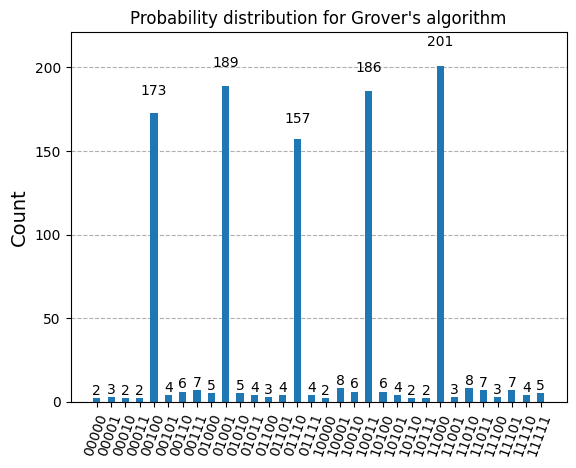

In [9]:
# Init circuit and run Grover's algorithm
# Define the number of qubits and the indices of the marked elements
circuit = Grover(5, [4,9,14,19,24])

# Run the circuit
result = simulator.run(circuit.decompose(reps=6)).result()

# Get the counts of probabilities
counts = result.get_counts(circuit)

# Plot the histogram
plot_histogram(counts, title="Probability distribution for Grover's algorithm")

Refs:
- Simulator: https://qiskit.github.io/qiskit-aer/tutorials/1_aersimulator.html